#Samer Baslan
#CMPE-297: Deep Auto ViML
#Fall 2021

Resource used: <br > https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Titanic.ipynb
<br >
Dataset used: <br > https://www.kaggle.com/fedesoriano/heart-failure-prediction

##Installs

In [2]:
!pip install deep_autoviml -qqq

     |████████████████████████████████| 139 kB 4.1 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |████████████████████████████████| 14.5 MB 55.1 MB/s 
     |████████████████████████████████| 170 kB 70.4 MB/s 
     |████████████████████████████████| 454.4 MB 9.9 kB/s 
     |████████████████████████████████| 308 kB 62.4 MB/s 
     |████████████████████████████████| 4.3 MB 51.1 MB/s 
     |████████████████████████████████| 462 kB 57.1 MB/s 
     |████████████████████████████████| 4.0 MB 54.3 MB/s 
     |████████████████████████████████| 1.2 MB 57.5 MB/s 
     |████████████████████████████████| 209 kB 60.5 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 75 kB 5.2 MB/s 
     |████████████████████████████████| 111 kB 72.4 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 144 kB 68.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the

##Imports

In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


from deep_autoviml import deep_autoviml as deepauto
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats

##Data Load/Setup

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download fedesoriano/heart-failure-prediction
!unzip heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 3.96MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [11]:
data = pd.read_csv("heart.csv")
target = "HeartDisease"

In [8]:
train, test = train_test_split(data, stratify=data["HeartDisease"], train_size=0.8, random_state=42)

##Hyperparameters

In [9]:
keras_model_type = "fast"

project_name = "tabular_task"

model_options = {
    "nlp_char_limit": 50,
    "cat_feat_cross_flag": False,
    "max_trials": 10,
    "tuner": "storm"
}

keras_options = {
    "patience": 10,
    "class_weight": True,
    "early_stopping": True,
    "lr_scheduler": "",
    "optimizer": "RMS"
}


##Train

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : False
    nlp_char_limit : 50
    max_trials : 10
    tuner : storm
max_trials set to 10 for fast models. Please increase it if you want better performance...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
#####

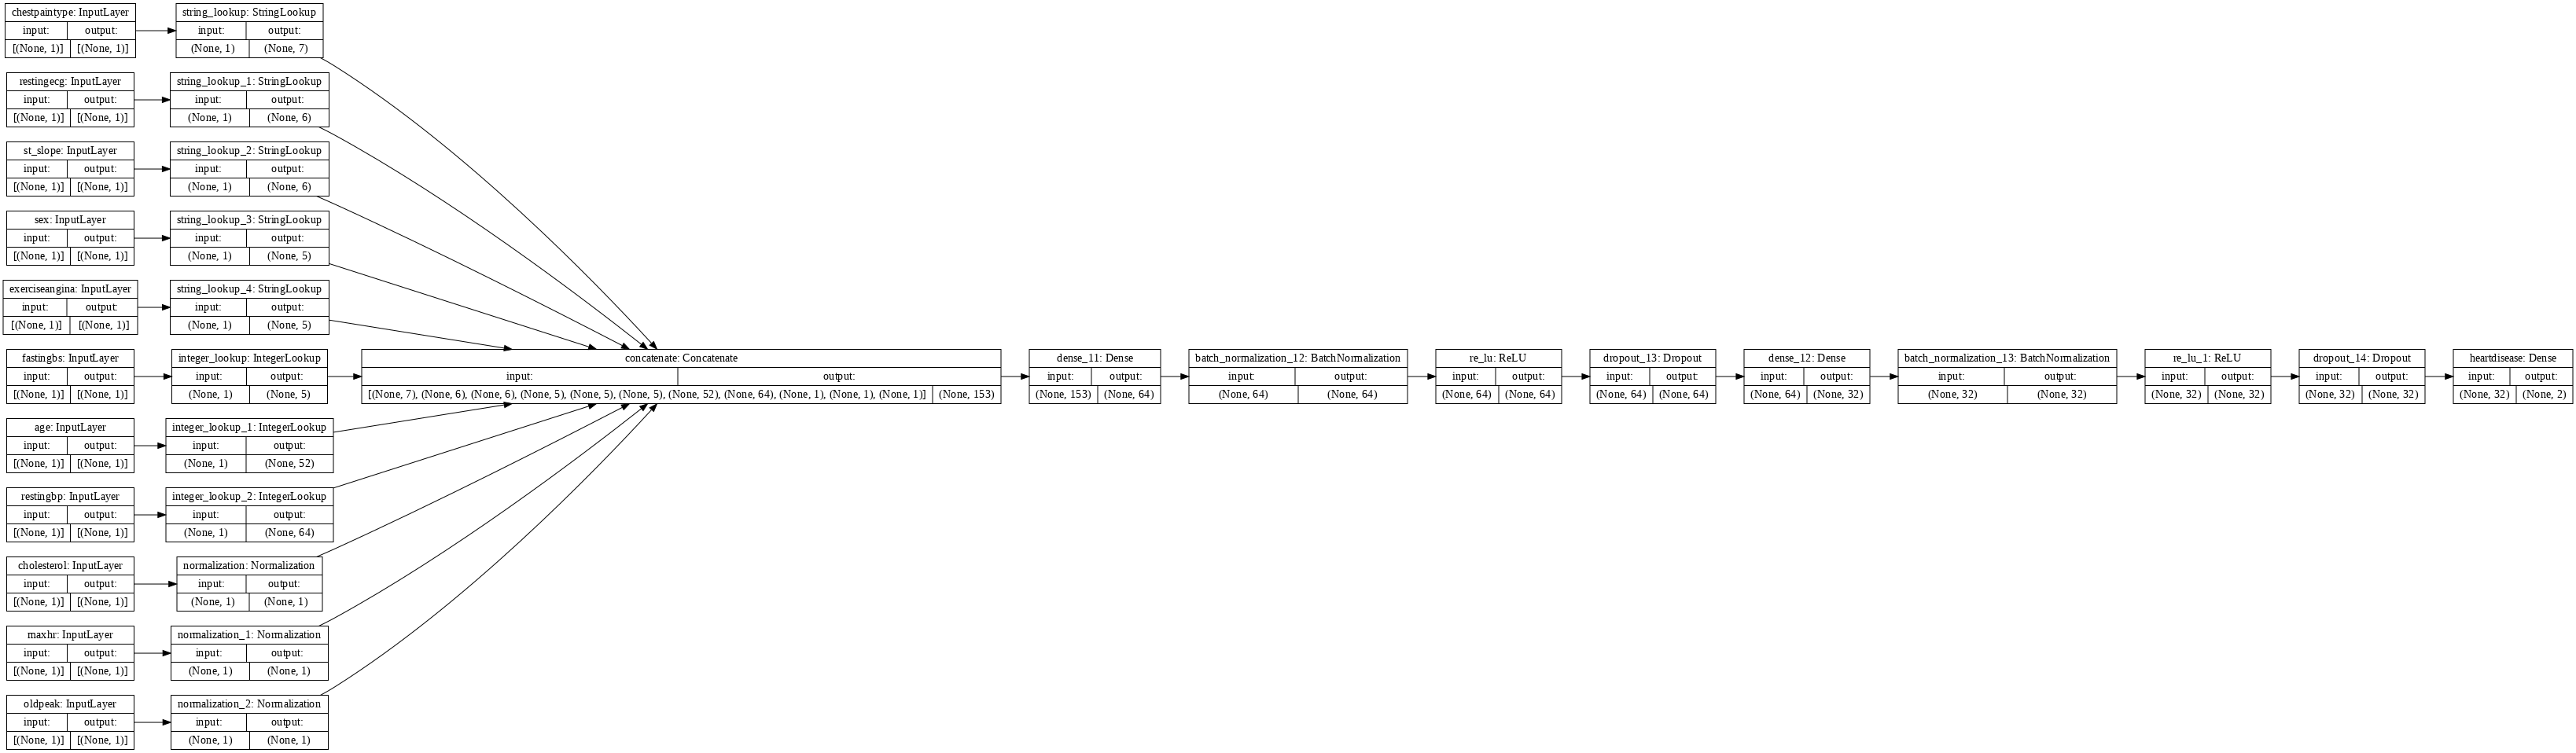


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a fast model option...
    class_weights: {0: 1.1189024390243902, 1: 1.0}
    original datasize = 734, initial batchsize = 32
    recommended steps per epoch = 11
    recommended OneCycle steps = 2300
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 100, steps per epoch = 11

Splitting train into 80+20 percent: train and validation data
    Splitting validation 20 into 10+10 percent: valid and heldout data
    shuffle size = 734
Model trai

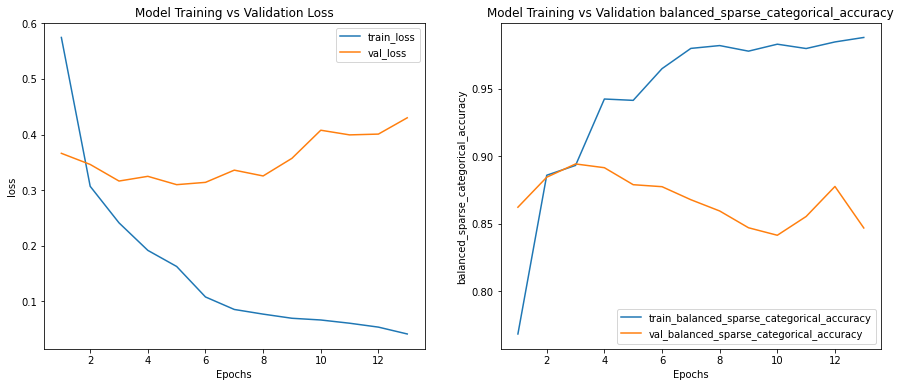


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: HeartDisease
#################################################################


    Accuracy          = 89.6%
    Balanced Accuracy = 89.4%
    Precision         = 90.9%
    Average Precision = 89.4%
    Recall            = 90.9%
    F1 Score          = 90.9%
    ROC AUC           = 92.7%
#####################################################

Training on full train dataset for 3 epochs. This will take time...
    completed. Time taken (in mins) = 0

Saving model architecture after training in tabular_task/fast/model_2021_11_01_04_43_43/artifacts/model_after.png...will take time...
Model plot saved in file: tabular_task/fast/model_2021_11_01_04_43_43/artifacts/model_after.png


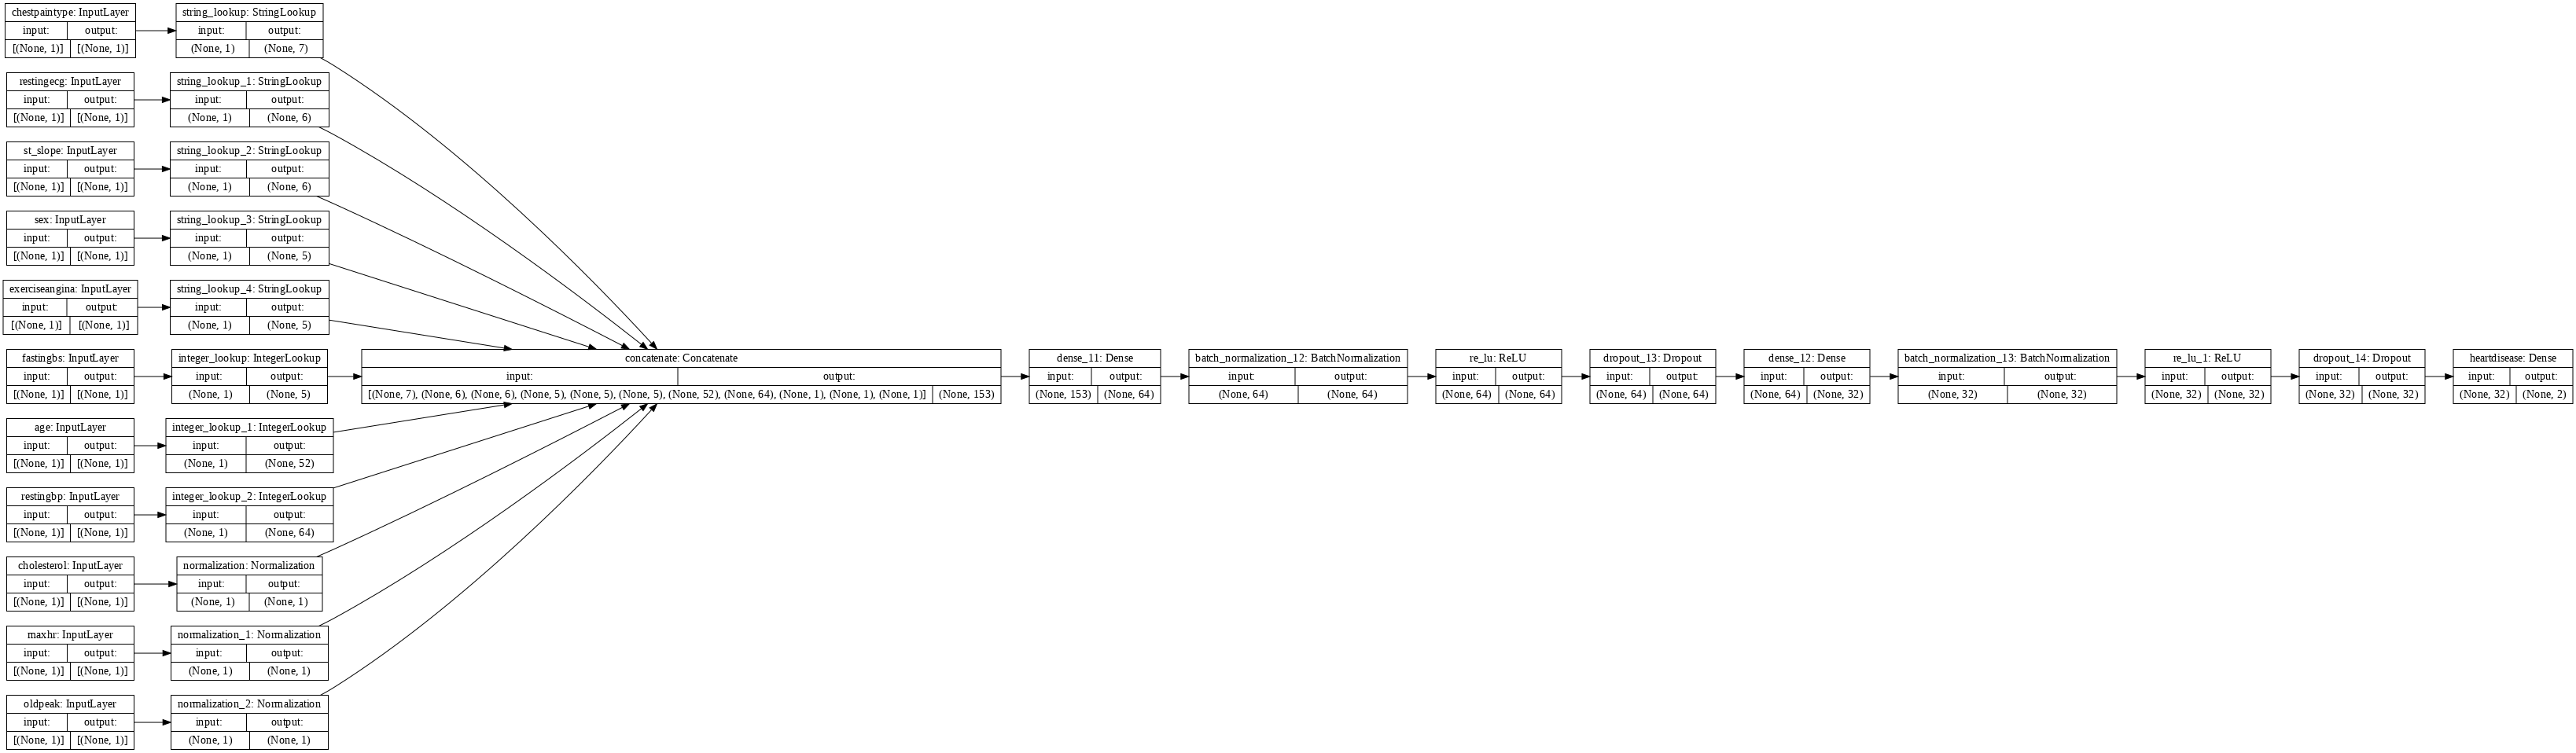

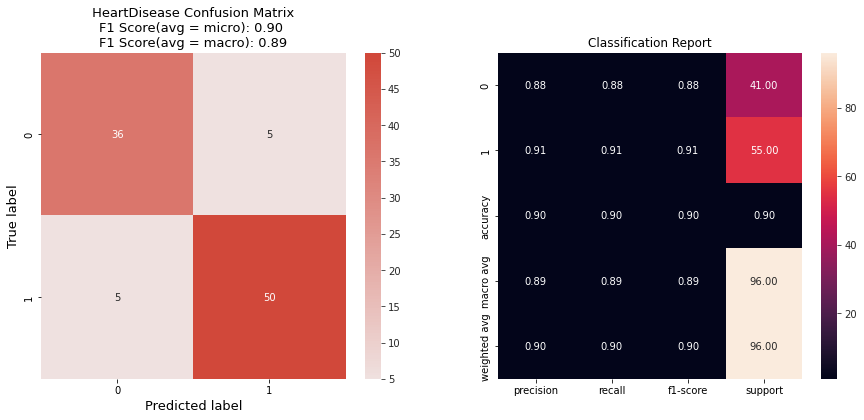

In [10]:
model, cat_vocab_dict = deepauto.fit(
    train,
    target,
    keras_model_type=keras_model_type,
    project_name=project_name,
    keras_options=keras_options,
    model_options=model_options,
    save_model_flag=True,
    use_my_model="",
    model_use_case="",
    verbose=1
)

##Results

In [12]:
predictions = deepauto.predict(
    model,
    project_name,
    test_dataset=test,
    keras_model_type=keras_model_type,
    cat_vocab_dict=cat_vocab_dict
)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x7f733b5c9ad0> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f733b5c9ad0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 184
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        No variables removed since no ID or low-information variables found in data set
Distribution of string columns in datatset:
    number of binary = 2, cats = 3, high cats = 0, very high cats = 0
Distribution of integer columns in

In [13]:
y_preds = predictions[1]
y_preds[:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [14]:
y_test = test[target].values
y_test[:10]

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [19]:
labels = np.unique(y_test)

In [16]:
print('Balanced Accuracy = %0.1f%%' %(100*balanced_accuracy_score(y_test, y_preds)))
print(classification_report(y_test, y_preds))

Balanced Accuracy = 87.4%
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



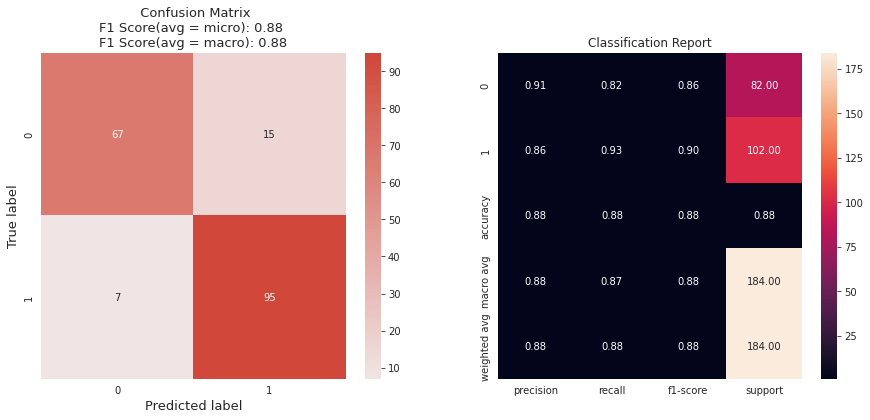

In [20]:
plot_classification_results(
    y_test,
    y_preds,
    labels,
    labels
)